# String-to-String Search Problems and Algorithms

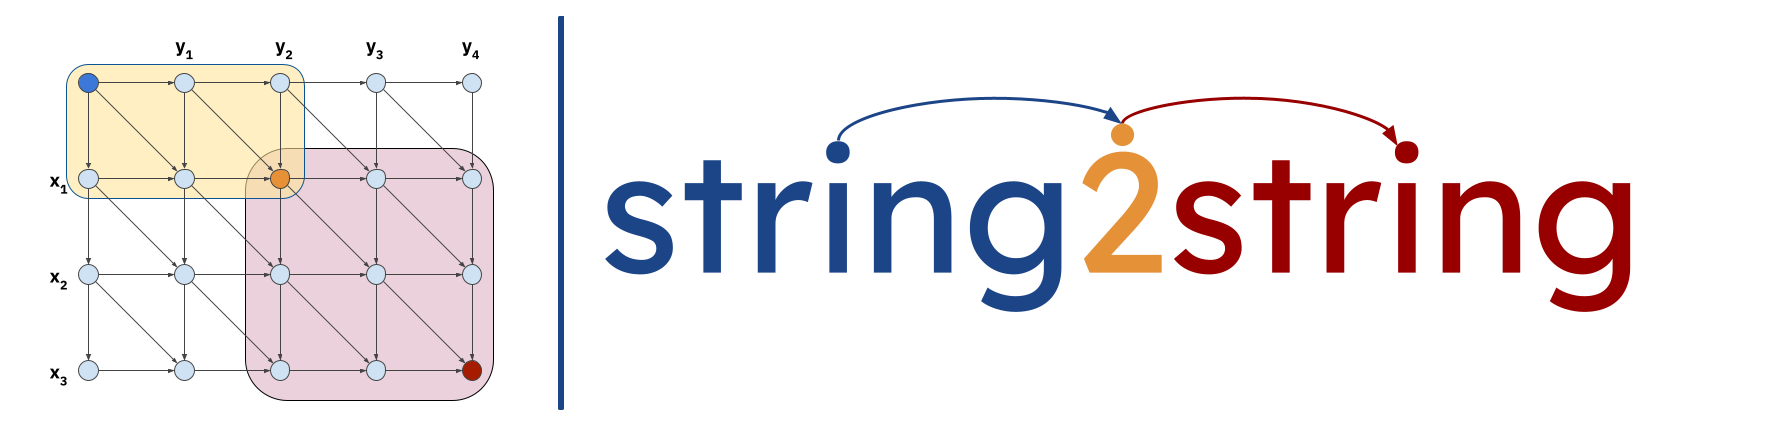

In [1]:
from IPython.display import Image
Image(filename='fables/string2string-logo.png')
# Image(url='https://raw.githubusercontent.com/stanfordnlp/string2string/main/fables/string2string-logo.png?token=GHSAT0AAAAAAB5KHQETSF3UOOWXYPJHECZAZAXW5HA')

This tutorial provides an introduction to the **search** module in the **string2string** package, and presents a few examples to showcase its usage. While it is not an exhaustive overview of the module, it offers insights into its key functionalities. For a more comprehensive understanding of the module, please consult the official documentation.

String search, also known as string matching, refers to the problem of determining whether a given pattern strings exists inside a longer string.

The string2string package currently offers the following search algorithms:

* Rabin-Karp search algorithm
* Knuth-Morris-Pratt (KMP) search algorithm
* Boyer-Moore search algorithm
* Naive (brute-force) search algorithm
* Faiss semantic search

Before we begin, please make sure that you have installed the string2string packag via *pip*.

In [2]:
# !pip install string2string

In [3]:
import time

## Rabin-Karp Search Algorithm

Rabin-Karp algorithm is a string search algorithm that uses rolling hashing function to find an exact match of a pattern in a text. 

In terms of its time complexity, Rabin-Karp algorithm is better than the naive string search algorithm; however, its worst case performance is still quadratic, that is $\mathcal{O}(nm)$), where $n$ is the length of the text and $m$ is the length of the pattern. On average, though, Rabin-Karp algorithm is linear, that is $\mathcal{O}(n)$. In terms of its space complexity, Rabin-Karp algorithm is $\mathcal{O}(1)$, which makes is space-wise efficient.

#### (Polynomial) Rolling Hashing Function for Rabin-Karp

Our string2string library offers a simple polynomial rolling hash function. THe function can be accessed as follows:

In [4]:
# The Rabin-Karp algorith makes use of a rolling hash function to find the hash value of a substring in constant time. Therefore, we will first load a rolling hash function class from the string2string.misc module.
from string2string.misc import PolynomialRollingHash

# Initialize the rolling hash function
rolling_hash = PolynomialRollingHash(
    base=10,
    modulus=65537,
)

/Users/machine/opt/anaconda3/envs/string2string/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Let's look at the rolling hash function in action.

In [5]:
# Let's look at the hash value of the string 'abc'.
print(rolling_hash.compute('abc'))

# Now, let's look at the hash value of the string 'bcd' using the rolling hash function.
print(rolling_hash.compute('bcd'))

# Let's look at the same hash value by calling the rolling hash function again. Note that the hash value is not the same as before.
print(rolling_hash.compute('bcd'))

10779
41822
20284


We can query the current hash value of the rolling hashing function.

In [6]:
# Print the current hash value
print(f'The current hash value is {rolling_hash.current_hash}.')

The current hash value is 20284.


Now, we are finally ready to initialize and use the Rabin-Karp search class. 

In [7]:
# Import the RabinKarp class from the search module
from string2string.search import RabinKarpSearch

rabin_karp = RabinKarpSearch(
    hash_function=rolling_hash,
)

Let's define a simpple pattern and a text.

In [8]:
pattern = 'Jane Austen'
text = 'Sense and Sensibility, Pride and Prejudice, Emma, Mansfield Park, Northanger Abbey, Persuasion, and Lady Susan were written by Jane Austen and are important works of English literature.'

# Now let's find the index of the pattern in the text, if it exists. We will also measure the time it takes to find the index.
start = time.time()
idx = rabin_karp.search(pattern=pattern,text=text)
end = time.time()

# Print the index
print(f'The index of the pattern in the text is {idx}.')

# Confirm that the pattern is indeed in the text.
print(f'The substring of length {len(pattern)} starting at index {idx} is indeed "{text[idx:idx + len(pattern)]}".')

# Print the time it took to find the index.
print(f'It took {end - start} seconds to find the index using the Rabin-Karp algorithm.')

The index of the pattern in the text is 127.
The substring of length 11 starting at index 127 is indeed "Jane Austen".
It took 0.0001990795135498047 seconds to find the index using the Rabin-Karp algorithm.


Let's look at another example, where the pattern is not included in the text: 

In [9]:
# Let's only change the pattern, but keep the text the same.
pattern = 'Martha Nussbaum'

# Now let's find the index of the pattern in the text, if it exists.
idx = rabin_karp.search(pattern=pattern,text=text)

# Print the index (it should be -1, indicating that the pattern is not in the text).
print(f'The index of the pattern in the text is {idx}.')

The index of the pattern in the text is -1.


## Knuth-Morris-Pratt (KMP) Search Algorithm

The [Knuth-Morris-Pratt (KMP) algorithm](https://en.wikipedia.org/wiki/Knuth%E2%80%93Morris%E2%80%93Pratt_algorithm) is another well-known member of the family of string search algorithms. Using the KMP algorithm in the string2string library is pretty simple, as shown below:

In [10]:
# Import the RabinKarp class from the search module
from string2string.search import KMPSearch

knuth_morris_pratt = KMPSearch()

# Next let's define a pattern and a text.
pattern = 'Jane Austen'
text = 'Sense and Sensibility, Pride and Prejudice, Emma, Mansfield Park, Northanger Abbey, Persuasion, and Lady Susan were written by Jane Austen and are important works of English literature.'

# Now let's find the index of the pattern in the text, if it exists. We will also measure the time it takes to find the index.
start = time.time()
idx = knuth_morris_pratt.search(pattern=pattern,text=text)
end = time.time()

# Print the index
print(f'The index of the pattern in the text is {idx}.')

# Confirm that the pattern is indeed in the text.
print(f'The substring of length {len(pattern)} starting at index {idx} is indeed "{text[idx:idx + len(pattern)]}".')

# Print the time it took to find the index.
print(f'It took {end - start} seconds to find the index using the Knuth-Morris-Pratt algorithm.')

The index of the pattern in the text is 127.
The substring of length 11 starting at index 127 is indeed "Jane Austen".
It took 9.703636169433594e-05 seconds to find the index using the Knuth-Morris-Pratt algorithm.


## Bayer-Moore Search Algorithm

The Boyer-Moore algorithm is an efficient string searching algorithm that makes use of two preprocessing rules, the bad character rule and the good suffix rule, to find a pattern within a text string.

One can use the Bayer-Moore search algorithm in our library as follows:

In [11]:
# Import the RabinKarp class from the search module
from string2string.search import BoyerMooreSearch

bayer_moore = BoyerMooreSearch()

# Next let's define a pattern and a text.
pattern = 'Jane Austen'
text = 'Sense and Sensibility, Pride and Prejudice, Emma, Mansfield Park, Northanger Abbey, Persuasion, and Lady Susan were written by Jane Austen and are important works of English literature.'

# Now let's find the index of the pattern in the text, if it exists. We will also measure the time it takes to find the index.
start = time.time()
idx = bayer_moore.search(pattern=pattern,text=text)
end = time.time()

# Print the index
print(f'The index of the pattern in the text is {idx}.')

# Confirm that the pattern is indeed in the text.
print(f'The substring of length {len(pattern)} starting at index {idx} is indeed "{text[idx:idx + len(pattern)]}".')

# Print the time it took to find the index.
print(f'It took {end - start} seconds to find the index using the Bayer-Moore algorithm.')

The index of the pattern in the text is 127.
The substring of length 11 starting at index 127 is indeed "Jane Austen".
It took 9.679794311523438e-05 seconds to find the index using the Bayer-Moore algorithm.


## Semantic Search via Faiss 

Faiss, a library developed by Facebook AI Research, is a highly efficient tool for clustering and performing similarity searches on dense vectors. Within our string2string library, we havve incorporated a wrapper around Faiss that enables us to utilize it for conducting semantic searches on text documents. 

To delve deeper into the process of using Faiss for semantic search on text documents, we have a separate notebook available entitled "[Tutorial] Semantic Search.ipynb", which provides detailed information.

In this tutorial though, we will work on a small toy example to demonstrate how to use Faiss for basic semantic similarity search.


In [12]:
# Import the FaissSearch class from the search module
from string2string.search import FaissSearch

# Initialize the FaissSearch class
faiss_search = FaissSearch(
    model_name_or_path = 'facebook/bart-large',
    tokenizer_name_or_path = 'facebook/bart-large',
)

##### Creating a Corpus

We can prepare a corpus (dataset) of texts to be used with the FaissSearch class. Our library can automatically tokenize the texts and create a vector representation of each text using the BART-large model and tokenizer that we passed to the FaissSearch class.

To create the dataset, we can use the "initialize_dataset_using_dict_or_pandas_or_dataset" method, which supports creating a dataset from a dictionary, a pandas dataframe, or a HuggingFace dataset. For this example, we will create a dataset from a dictionary.

In [13]:
# Let's generate a corpus (dataset) of 25 sentences (we generated these sentences using ChatGPT).
corpus = {
        'text': [
            "Coffee is my go-to drink in the morning.", 
            "I always try to make time for exercise.", 
            "Learning something new every day keeps me motivated.", 
            "The sunsets in my hometown are breathtaking.", 
            "I am grateful for the support of my friends and family.", 
            "The book I'm reading is incredibly captivating.", 
            "I love listening to music while I work.", 
            "I'm excited to try the new restaurant in town.", 
            "Taking a walk in nature always clears my mind.", 
            "I believe that kindness is the most important trait.", 
            "It's important to take breaks throughout the day.", 
            "I'm looking forward to the weekend.", 
            "Reading before bed helps me relax.", 
            "I try to stay positive even in difficult situations.", 
            "Cooking is one of my favorite hobbies.", 
            "I'm grateful for the opportunity to learn and grow every day.", 
            "I love traveling and experiencing new cultures.", 
            "I'm proud of the progress I've made so far.", 
            "A good night's sleep is essential for my well-being.", 
            "Spending time with loved ones always brings me joy.", 
            "I'm grateful for the beauty of nature around me.", 
            "I try to live in the present moment and appreciate what I have.", 
            "I believe that honesty is always the best policy.", 
            "I enjoy challenging myself and pushing my limits.", 
            "I'm excited to see what the future holds."
        ],
}


Now we are finally read to initalize the corpus of our semantic search model! 
- We will be using the "text" section of the corpus, which contains the sentences. 
- When we initialize our search corpus, we not only map the section of the dataset to the embeddings (in our example
, we will be generating the embeddings of the sentences using the BART model), but also add proper Faiss indices. 

In [14]:
# Let's initialize the dataset using the corpus we just created.
print('Initializing the dataset...')
faiss_search.initialize_corpus(
    corpus=corpus,
    section='text', 
    embedding_type='mean_pooling',
)

Initializing the dataset...


100%|██████████| 25/25 [00:06<00:00,  3.67ex/s]


Adding FAISS index...


100%|██████████| 1/1 [00:00<00:00, 1199.06it/s]


Dataset({
    features: ['text', 'embeddings'],
    num_rows: 25
})

##### Let's search!

We are finally perform some searches!

In [15]:

# Let's define a query.
query = 'I like going for a run in the morning.'

# Let's find the top 5 most similar sentences in the corpus to the query and print them, as well as their similarity scores.
top_k = 5
top_k_results = faiss_search.search(
    query=query,
    k = top_k,
)



In [16]:
# Let's print the results of the search (as a dataframe)
top_k_results

,text,embeddings,score
0,I always try to make time for exercise.,"[0.042366329580545425, 2.501657247543335, 0.73...",170.651855
1,I love listening to music while I work.,"[-0.2756528854370117, 2.0813395977020264, 0.52...",186.643372
2,I'm grateful for the beauty of nature around me.,"[0.14997272193431854, 2.2907376289367676, 0.07...",193.678802
3,Taking a walk in nature always clears my mind.,"[0.35976657271385193, 2.771191358566284, -0.06...",204.292664
4,I enjoy challenging myself and pushing my limits.,"[0.31755349040031433, 2.1585004329681396, 0.26...",217.616043


Let's print the results of the search in a more readable format. We will also print the similarity scores.

In [17]:
# Let's define a function to print the results of the search.
def print_results(query, results, top_k):
    # Let's first print the query.
    print(f'Query: "{query}"\n')

    # Let's now print the top k results.
    print(f'Top {top_k} most similar sentences in the corpus to the query (smallest score is most similar):')
    for i in range(top_k):
        print(f' - {i+1}: "{results["text"][i]}" with a similarity score of {top_k_results["score"][i]:.2f}')

In [18]:
print_results(query=query, results=top_k_results, top_k=top_k)

Query: "I like going for a run in the morning."

Top 5 most similar sentences in the corpus to the query (smallest score is most similar):
 - 1: "I always try to make time for exercise." with a similarity score of 170.65
 - 2: "I love listening to music while I work." with a similarity score of 186.64
 - 3: "I'm grateful for the beauty of nature around me." with a similarity score of 193.68
 - 4: "Taking a walk in nature always clears my mind." with a similarity score of 204.29
 - 5: "I enjoy challenging myself and pushing my limits." with a similarity score of 217.62


Let's perform another query.

In [19]:
# Let's define a new query.
query = 'I am interested in cooking and baking.'

# Let's find the top 3 most similar sentences in the corpus to the query and print them, as well as their similarity scores.
top_k = 3
top_k_results = faiss_search.search(
    query=query,
    k = top_k,
)

In [20]:
print_results(query=query, results=top_k_results, top_k=top_k)

Query: "I am interested in cooking and baking."

Top 3 most similar sentences in the corpus to the query (smallest score is most similar):
 - 1: "Cooking is one of my favorite hobbies." with a similarity score of 149.13
 - 2: "I love traveling and experiencing new cultures." with a similarity score of 181.51
 - 3: "I love listening to music while I work." with a similarity score of 204.53


>  And with that, we have reached the end of the alignment tutorial. We hope that you have found it useful. If you have any questions or suggestions, please feel free to contact us.

##### $\square$ Q.E.D.